In [1]:
import pandas as pd
#!pip install pandas_datareader to validate crypto pricing with specific date
import pandas_datareader as web
import datetime as dt
from datetime import date

import seaborn as sns
from numerize import numerize
import matplotlib.patches as patches
import matplotlib.pyplot as plt

In [11]:
start = dt.datetime(2022,3,9)
end = dt.datetime(2022,5,1)

In [12]:
GST = web.DataReader('GST2-USD','yahoo', start, end)
GMT = web.DataReader('GMT3-USD','yahoo', start, end)

In [13]:
GST = GST.reset_index()
GMT = GMT.reset_index()

In [14]:
colors = {'red': '#ff207c', 'grey': '#42535b', 'blue': '#207cff', 'orange': '#ffa320', 'green': '#00ec8b'}
config_ticks = {'size': 14, 'color': colors['grey'], 'labelcolor': colors['grey']}
config_title = {'size': 18, 'color': colors['grey'], 'ha': 'left', 'va': 'baseline'}

In [15]:
def get_charts(data, title):
    plt.rc('figure', figsize=(15, 10))
    
    fig, axes = plt.subplots(2, 1, 
                gridspec_kw={'height_ratios': [3, 1]})
    fig.tight_layout(pad=3)
    fig.suptitle(title, fontsize=16)
    
    date = data['Date']
    close = data['Close']
    vol = data['Volume']
    
    plot_price = axes[0]
    plot_price.plot(date, close, color=colors['blue'], 
    linewidth=2, label='Price')
    plot_price.set_ylabel('Price (in USD)', fontsize=14)
    plot_price.set_xlabel('Date', fontsize=14)
    
    plot_vol = axes[1]
    plot_vol.bar(date, vol, width=15, color='darkgrey')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Volume (in millions)', fontsize=14)

In [19]:
def get_percent(symbol, data):
    data_percent = (data['Close'].max()/data['Close'].min())*100
    print('{0} : {1:.2f}%'.format(symbol, data_percent))

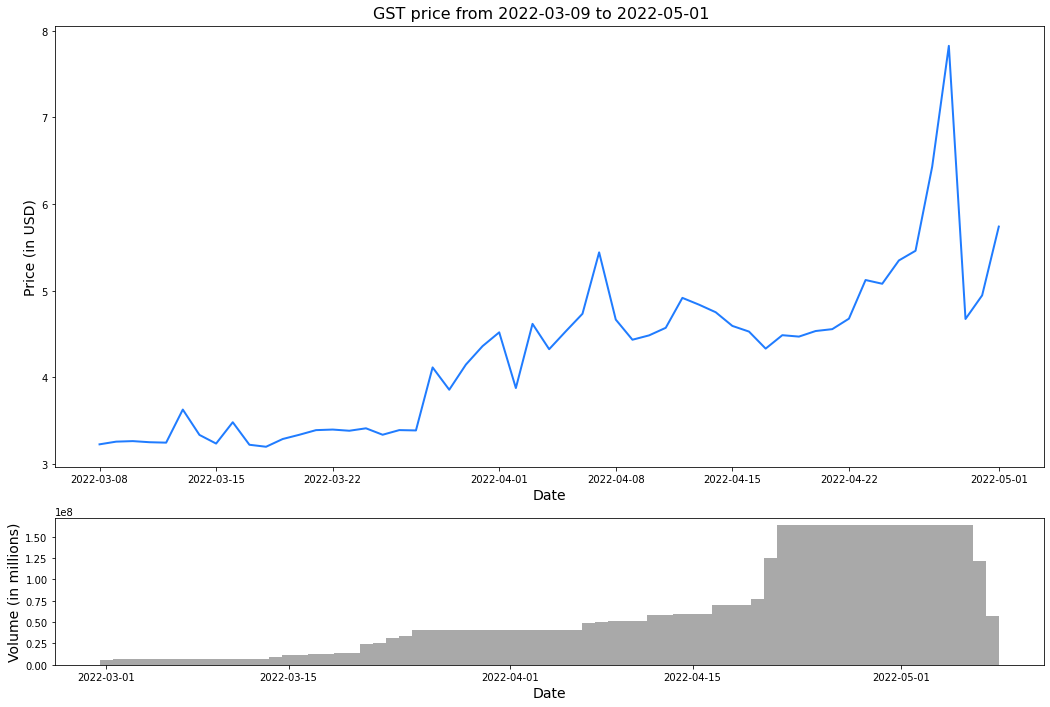

In [16]:
get_charts(GST, 'GST price from {0} to {1}'.format(start.date(), end.date()))

In [22]:
GST.describe()

,High,Low,Open,Close,Volume,Adj Close
count,55.000000,55.000000,55.000000,55.000000,5.500000e+01,55.000000
mean,4.581461,3.996513,4.223655,4.267851,3.568837e+07,4.267851
std,1.199985,0.713056,0.908219,0.920984,3.209642e+07,0.920984
min,3.227076,3.006385,3.201117,3.201117,4.237643e+06,3.201117
25%,3.480136,3.315520,3.387478,3.391023,1.067059e+07,3.391023
50%,4.661220,4.012972,4.361313,4.435076,3.155100e+07,4.435076
75%,4.954655,4.508853,4.667488,4.676061,5.077526e+07,4.676061
max,9.028265,6.112372,7.833745,7.823327,1.639175e+08,7.823327


In [23]:
get_percent('GST', GST)

GST : 244.39%


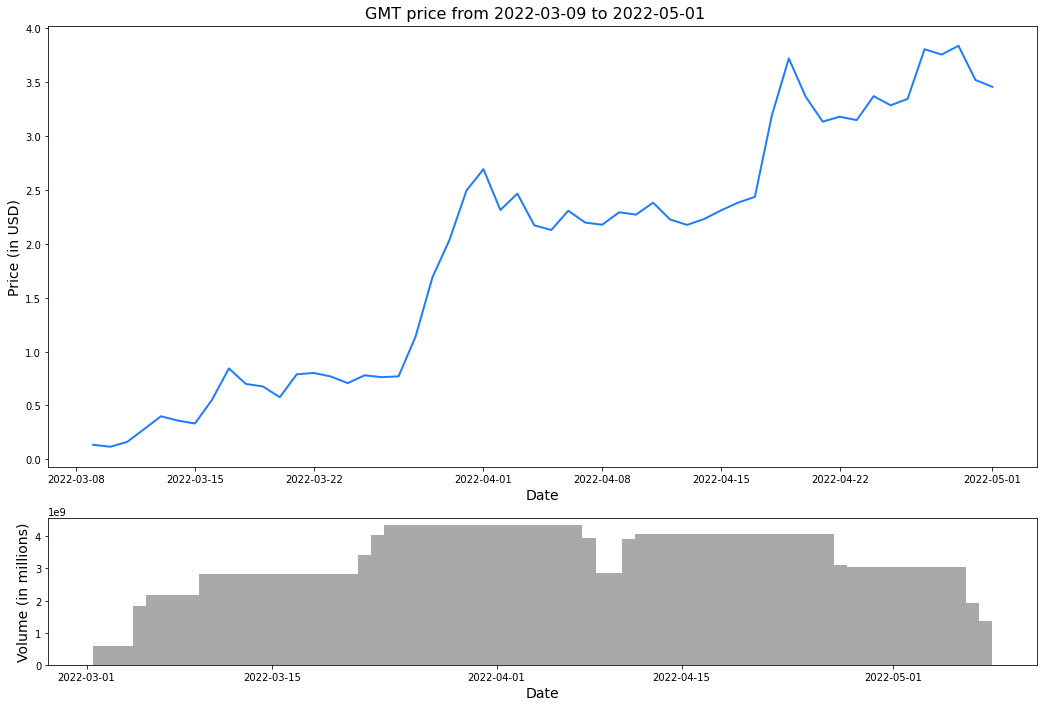

In [17]:
get_charts(GMT, 'GMT price from {0} to {1}'.format(start.date(), end.date()))

In [24]:
GMT.describe()

,High,Low,Open,Close,Volume,Adj Close
count,54.000000,54.000000,54.000000,54.000000,5.400000e+01,54.000000
mean,2.098638,1.775402,1.884274,1.945780,1.734939e+09,1.945780
std,1.256671,1.119897,1.181753,1.176000,1.095976e+09,1.176000
min,0.144942,0.100344,0.117614,0.117401,1.820756e+08,0.117401
25%,0.819084,0.684771,0.764087,0.769370,8.432379e+08,0.769370
50%,2.350524,2.102736,2.184950,2.210023,1.517180e+09,2.210023
75%,3.234291,2.392008,2.637970,3.021079,2.179560e+09,3.021079
max,4.114427,3.597147,3.831956,3.833883,4.354716e+09,3.833883


In [25]:
get_percent('GMT', GMT)

GMT : 3265.63%
